<a href="https://colab.research.google.com/github/jenius13/Opencv-tutorial/blob/master/Opencv_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded=files.upload()

Saving DF909_01_01.jpg to DF909_01_01.jpg


# 2차원 Convolution Filter

### 0~1 사이의 값으로 구성된 3x3 커널을 생성한 후 이미지에 적용한 뒤 두 이미지를 동시에 출력해보자. 단,이미지에 적용하기 전 높이,너비를 256,256으로 크기를 조절 하고 gray로 변환한다(또는 gray로 읽는다)

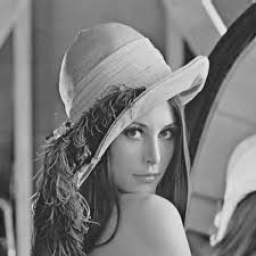

(256, 256)


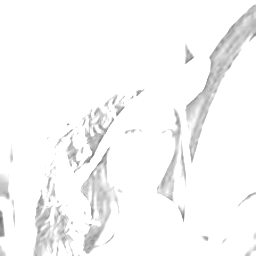

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


image_path='/content/DF909_01_01.jpg'
# opencv를 이용한 gray scale로 파일 읽기
img=cv2.imread(image_path,2)

# image resize(src,dsize=,interpolation)
img=cv2.resize(img,dsize=(256,256),interpolation=cv2.INTER_AREA)
cv2_imshow(img)
print(img.shape)

# kernel random 3*3
kernel=np.random.rand(3,3)
# print(kernel)
dst=cv2.filter2D(img,-1,kernel)
cv2_imshow(dst)


# Blurring

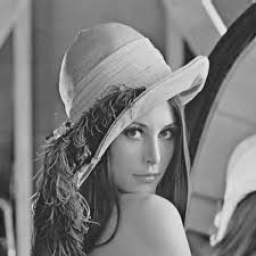

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


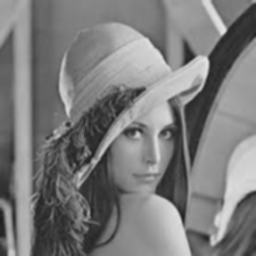

In [14]:
cv2_imshow(img)
kernel=np.ones((3,3),dtype='float32')/9
print(kernel)

dst=cv2.filter2D(img,-1,kernel)
cv2_imshow(dst)

# Sharpening

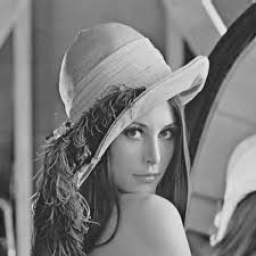

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


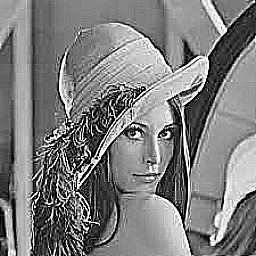

In [17]:
cv2_imshow(img)
kernel=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
print(kernel)

dst=cv2.filter2D(img,-1,kernel)
cv2_imshow(dst)

# Add Salt and Pepper Noise

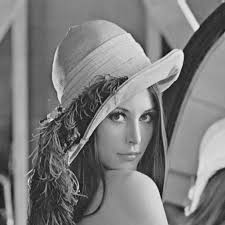

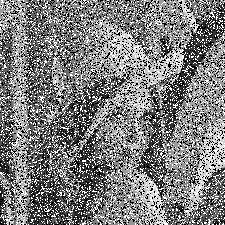

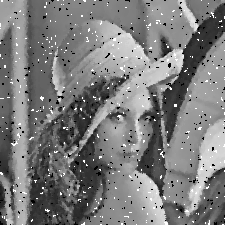

In [47]:
# salt and pepper
# p 보다 작은 rdn=0,thres=1-p 보다 큰값 255, else 본 이미지

from random import random

def salt_and_pepper(image, p):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - p
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random()
            if rdn < p:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
# original
img=cv2.imread(image_path,2)
cv2_imshow(img)
# add noise
img_noise=salt_and_pepper(img,0.2)
cv2_imshow(img_noise)
# median Blur
img_blur=cv2.medianBlur(img_noise,ksize=3)
cv2_imshow(img_blur)

# Sobel(edge detection)

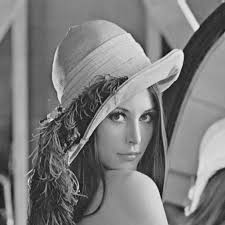

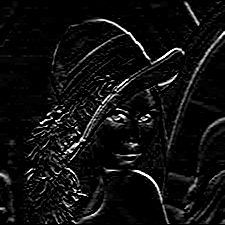

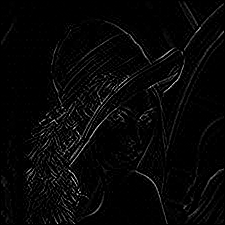

In [46]:
cv2_imshow(img)

# Sobel(src,dx,dy,ksize)
dst=cv2.Sobel(img,-1,dx=0,dy=1,ksize=3)
cv2_imshow(dst)

dst=cv2.Sobel(img,-1,dx=1,dy=1,ksize=3)
cv2_imshow(dst)

# Laplacian

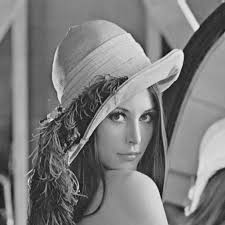

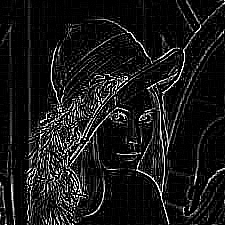

In [45]:
cv2_imshow(img)

# Laplacian x 2차편미분,y 2차 편미분
# Laplacian(src,ddepth,ksize)
dst=cv2.Laplacian(img,-1,ksize=3)
cv2_imshow(dst)

# Canny

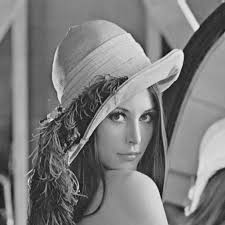

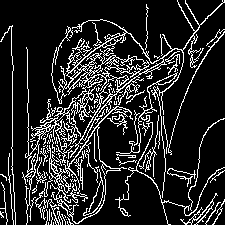

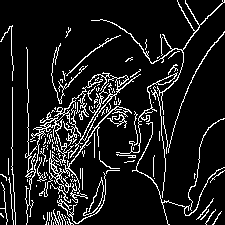

In [44]:
cv2_imshow(img)

#Canny(src,threshold1,threshold2)
dst=cv2.Canny(img,10,200)
cv2_imshow(dst)
dst=cv2.Canny(img,100,200)
cv2_imshow(dst)